# The Sparks Foundation : GRIP

## Data Science and Business Analytics Intern - Jyoti Karsh

## Task 1: Prediction using Supervised ML

## Problem Statement
In this task we have to predict the percentage of a student based on the number of study hours. This is a simple linear regression task consisting of 2 variables.

In [25]:
# Importing all required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [26]:
# Reading data to a dataframe
data = pd.read_csv("http://bit.ly/w-data")

In [27]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [28]:
data.shape

(25, 2)

In [29]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


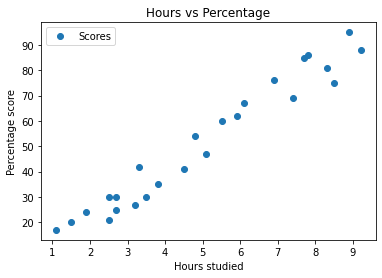

In [31]:
# Finding the correlation between variables
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

There is a positive linear relation between the 2 variables.

In [32]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [33]:
# Dividing our data into dependent and independent variables
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [34]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the algorithm

In [35]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) # fitting the model

LinearRegression()

In [36]:
line = regressor.coef_*X+regressor.intercept_ # Plotting the regression line

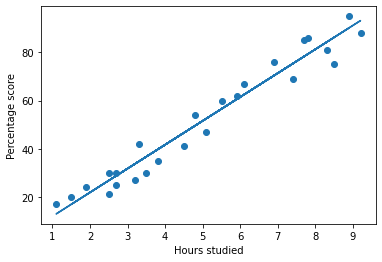

In [37]:
# plotting the test data
plt.scatter(X, y)
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.plot(X, line);
plt.show()

### Making predictions

In [38]:
y_pred = regressor.predict(X_test)

In [39]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


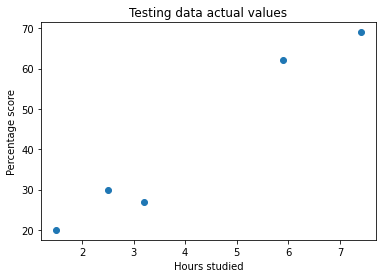

In [41]:
plt.scatter(X_test,y_test)
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.title('Testing data actual values')
plt.show()

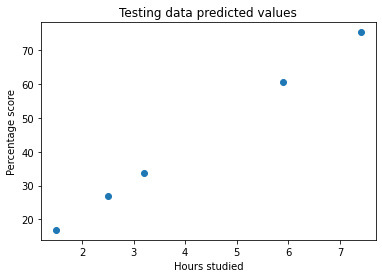

In [42]:
plt.scatter(X_test,y_pred)
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.title('Testing data predicted values')
plt.show()

In [43]:
hours = 9.25
percent = regressor.predict([[hours]])
print("If a student studies for {} hours per day he/she will score {}% in exam.".format(hours,percent))

If a student studies for 9.25 hours per day he/she will score [93.69173249]% in exam.


### Evaluating the algorithm

In [44]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
